# Import

In [1]:
import pandas as pd
import numpy as np
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.naive_bayes import GaussianNB , MultinomialNB , ComplementNB , BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Prepare Data

In [3]:
column_names = ['polarity', 'title', 'text']
data=pd.read_csv("train.csv")
data.columns=column_names

In [4]:
data.drop(columns='title',inplace=True)

In [5]:
data.head()

,polarity,text
0,2,I'm reading a lot of reviews saying that this ...
1,2,This soundtrack is my favorite music of all ti...
2,2,I truly like this soundtrack and I enjoy video...
3,2,"If you've played the game, you know how divine..."
4,2,I am quite sure any of you actually taking the...


In [6]:
data['polarity'].replace({1: 0}, inplace=True)

In [7]:
data['polarity'].replace({2: 1}, inplace=True)

In [8]:
Number_Of_record=data.shape[0]
print("number of record is ",Number_Of_record)

number of record is  3599999


In [9]:
postive_number=data[data['polarity']==1].shape[0]
negtive_number=data[data['polarity']==0].shape[0]
    
print("postive number is ",postive_number)
print("negtive number is ",negtive_number)

postive number is  1799999
negtive number is  1800000


In [10]:
data_postive=data[data['polarity']==1]
data_negtive=data[data['polarity']==0]
subset_positive_data = data_postive.sample(n=10000, random_state=5)
subset_negtive_data = data_negtive.sample(n=10000, random_state=5)

In [11]:
subset_positive_data['polarity'].unique()

array([1], dtype=int64)

In [12]:
subset_negtive_data['polarity'].unique()

array([0], dtype=int64)

In [13]:
Data=pd.concat([subset_positive_data, subset_negtive_data], ignore_index=True)

In [ ]:
Data.to_csv("sentiment analysis3.csv", index=False)

In [14]:
Data = pd.read_csv('sentiment analysis3.csv')
Data.shape

(20000, 2)

In [15]:
Data.head()

,polarity,text
0,1,If your skin has a tendency to get burns or in...
1,1,I think this book was simply smashing. The cha...
2,1,While I was laid up for 7 weeks with a broken ...
3,1,I chose this rating because I liked the produc...
4,1,"[SPOILER] While Gal Costa sings ""Se Todos Foss..."


In [16]:
Data.isnull().sum()

polarity    0
text        0
dtype: int64

In [17]:
Data = Data.drop_duplicates(keep='first')
Data.shape

(20000, 2)

In [18]:
X_data=Data['text']
y_data=Data['polarity']

# Preprocessing

In [19]:
stopwords_english=['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'at',
 'by',
 'for',
 'with',
 'about',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'on',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'own',
 's',
 'can',
 'will',
 'just',
 'don'
 'now',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 'ma']

In [20]:
class Preprocessing:
    def __init__(self, data):
        self.txt = data

    def remove_punctuation(self):
        punc = list(punctuation)
        remove_pun  = [''.join(char for char in sentence if char not in punc) for sentence in self.txt]
        self.txt=remove_pun
        print(self.txt[:5])
        
    def Word_Tokenization(self):
        tokenized_sentences = []
        for sentence in self.txt:
            tokens = word_tokenize(sentence)
            tokenized_sentences.append(tokens)
        self.txt = tokenized_sentences
        print(self.txt[:5])

    def remove_stop_words(self):
        stop_words = stopwords_english
        filtered_sentences = []
        for sentence in self.txt:
            filtered_words = []
            for word in sentence:
                if word.lower() not in stop_words:
                    filtered_words.append(word.lower())
            filtered_sentences.append(filtered_words)
        self.txt = filtered_sentences
        print(self.txt[:5])

    def snowball_stemmer(self):
        ps = SnowballStemmer(language='english')
        snowball_sentences = []
        for sentence in self.txt:
            snowball_words = []
            for word in sentence:
                snowball_words.append(ps.stem(word))
            snowball_sentences.append(snowball_words)
        self.txt = snowball_sentences
        print(self.txt[:5])

    def portstemmer_sentence(self):
        ps = PorterStemmer()
        portstemmer_sentences = []
        for sentence in self.txt:
            portstemmer_words = []
            for word in sentence:
                portstemmer_words.append(ps.stem(word))
            portstemmer_sentences.append(portstemmer_words)
        self.txt = portstemmer_sentences
        print(self.txt[:5])

    def lemmatization(self):
        lemmatizer=WordNetLemmatizer()
        lemma_sentences = []
        for sentence in self.txt:
            lemma_words = []
            for word in sentence:
                lemma_words.append(lemmatizer.lemmatize(word))
            lemma_sentences.append(lemma_words)
        self.txt = lemma_sentences
        print(self.txt[:5])

    def return_data(self):
        new=[]
        for sentences in self.txt:
            sentence = ' '.join(sentences)
            new.append(sentence)
        return new

In [21]:
processed_data=Preprocessing(X_data)

In [22]:
processed_data.remove_punctuation()

['If your skin has a tendency to get burns or ingrown hairs from shaving then this stuff will fix you right upI have sensitive skin and I have been using this product for about 8 years and I wont bother trying anything else Use it regularly and properly and it will reduce or eliminate razor burn and ingrown hairsIt stings a little when it goes on but Ill gladly suffer that temporary discomfort to gain the smooth and blemishfree skin it provides', 'I think this book was simply smashing The charactors came alive as you read the book and the angels were simply adorable The book is written in a matter that the charactors come alive and you feel as though you are there in the book with them The book makes you laugh cry and just feel your emotions clearly I would recomend this book to anyone I know Matter of fact I am in the process of doing just that So if you are into reading outstanding books this is one of the best', 'While I was laid up for 7 weeks with a broken foot I ordered this to p

In [23]:
processed_data.Word_Tokenization()

[['If', 'your', 'skin', 'has', 'a', 'tendency', 'to', 'get', 'burns', 'or', 'ingrown', 'hairs', 'from', 'shaving', 'then', 'this', 'stuff', 'will', 'fix', 'you', 'right', 'upI', 'have', 'sensitive', 'skin', 'and', 'I', 'have', 'been', 'using', 'this', 'product', 'for', 'about', '8', 'years', 'and', 'I', 'wont', 'bother', 'trying', 'anything', 'else', 'Use', 'it', 'regularly', 'and', 'properly', 'and', 'it', 'will', 'reduce', 'or', 'eliminate', 'razor', 'burn', 'and', 'ingrown', 'hairsIt', 'stings', 'a', 'little', 'when', 'it', 'goes', 'on', 'but', 'Ill', 'gladly', 'suffer', 'that', 'temporary', 'discomfort', 'to', 'gain', 'the', 'smooth', 'and', 'blemishfree', 'skin', 'it', 'provides'], ['I', 'think', 'this', 'book', 'was', 'simply', 'smashing', 'The', 'charactors', 'came', 'alive', 'as', 'you', 'read', 'the', 'book', 'and', 'the', 'angels', 'were', 'simply', 'adorable', 'The', 'book', 'is', 'written', 'in', 'a', 'matter', 'that', 'the', 'charactors', 'come', 'alive', 'and', 'you', 'fe

In [24]:
processed_data.remove_stop_words()

[['skin', 'tendency', 'get', 'burns', 'ingrown', 'hairs', 'shaving', 'stuff', 'fix', 'right', 'upi', 'sensitive', 'skin', 'using', 'product', '8', 'years', 'wont', 'bother', 'trying', 'anything', 'else', 'use', 'regularly', 'properly', 'reduce', 'eliminate', 'razor', 'burn', 'ingrown', 'hairsit', 'stings', 'little', 'goes', 'but', 'ill', 'gladly', 'suffer', 'temporary', 'discomfort', 'gain', 'smooth', 'blemishfree', 'skin', 'provides'], ['think', 'book', 'simply', 'smashing', 'charactors', 'came', 'alive', 'read', 'book', 'angels', 'simply', 'adorable', 'book', 'written', 'matter', 'charactors', 'come', 'alive', 'feel', 'though', 'book', 'book', 'makes', 'laugh', 'cry', 'feel', 'emotions', 'clearly', 'would', 'recomend', 'book', 'anyone', 'know', 'matter', 'of', 'fact', 'process', 'of', 'so', 'reading', 'outstanding', 'books', 'one', 'of', 'best'], ['laid', '7', 'weeks', 'broken', 'foot', 'ordered', 'play', 'kindle', 'so', 'beautiful', 'relaxing', 'also', 'ordered', 'cd', 'several', 'c

In [25]:
processed_data.snowball_stemmer()

[['skin', 'tendenc', 'get', 'burn', 'ingrown', 'hair', 'shave', 'stuff', 'fix', 'right', 'upi', 'sensit', 'skin', 'use', 'product', '8', 'year', 'wont', 'bother', 'tri', 'anyth', 'els', 'use', 'regular', 'proper', 'reduc', 'elimin', 'razor', 'burn', 'ingrown', 'hairsit', 'sting', 'littl', 'goe', 'but', 'ill', 'glad', 'suffer', 'temporari', 'discomfort', 'gain', 'smooth', 'blemishfre', 'skin', 'provid'], ['think', 'book', 'simpli', 'smash', 'charactor', 'came', 'aliv', 'read', 'book', 'angel', 'simpli', 'ador', 'book', 'written', 'matter', 'charactor', 'come', 'aliv', 'feel', 'though', 'book', 'book', 'make', 'laugh', 'cri', 'feel', 'emot', 'clear', 'would', 'recomend', 'book', 'anyon', 'know', 'matter', 'of', 'fact', 'process', 'of', 'so', 'read', 'outstand', 'book', 'one', 'of', 'best'], ['laid', '7', 'week', 'broken', 'foot', 'order', 'play', 'kindl', 'so', 'beauti', 'relax', 'also', 'order', 'cd', 'sever', 'cds', 'like', 'play', 'day', 'background', 'music', 'add', 'special', 'touch

In [26]:
processed_data.portstemmer_sentence()

[['skin', 'tendenc', 'get', 'burn', 'ingrown', 'hair', 'shave', 'stuff', 'fix', 'right', 'upi', 'sensit', 'skin', 'use', 'product', '8', 'year', 'wont', 'bother', 'tri', 'anyth', 'el', 'use', 'regular', 'proper', 'reduc', 'elimin', 'razor', 'burn', 'ingrown', 'hairsit', 'sting', 'littl', 'goe', 'but', 'ill', 'glad', 'suffer', 'temporari', 'discomfort', 'gain', 'smooth', 'blemishfr', 'skin', 'provid'], ['think', 'book', 'simpli', 'smash', 'charactor', 'came', 'aliv', 'read', 'book', 'angel', 'simpli', 'ador', 'book', 'written', 'matter', 'charactor', 'come', 'aliv', 'feel', 'though', 'book', 'book', 'make', 'laugh', 'cri', 'feel', 'emot', 'clear', 'would', 'recomend', 'book', 'anyon', 'know', 'matter', 'of', 'fact', 'process', 'of', 'so', 'read', 'outstand', 'book', 'one', 'of', 'best'], ['laid', '7', 'week', 'broken', 'foot', 'order', 'play', 'kindl', 'so', 'beauti', 'relax', 'also', 'order', 'cd', 'sever', 'cd', 'like', 'play', 'day', 'background', 'music', 'add', 'special', 'touch', 

In [27]:
processed_data.lemmatization()

[['skin', 'tendenc', 'get', 'burn', 'ingrown', 'hair', 'shave', 'stuff', 'fix', 'right', 'upi', 'sensit', 'skin', 'use', 'product', '8', 'year', 'wont', 'bother', 'tri', 'anyth', 'el', 'use', 'regular', 'proper', 'reduc', 'elimin', 'razor', 'burn', 'ingrown', 'hairsit', 'sting', 'littl', 'goe', 'but', 'ill', 'glad', 'suffer', 'temporari', 'discomfort', 'gain', 'smooth', 'blemishfr', 'skin', 'provid'], ['think', 'book', 'simpli', 'smash', 'charactor', 'came', 'aliv', 'read', 'book', 'angel', 'simpli', 'ador', 'book', 'written', 'matter', 'charactor', 'come', 'aliv', 'feel', 'though', 'book', 'book', 'make', 'laugh', 'cri', 'feel', 'emot', 'clear', 'would', 'recomend', 'book', 'anyon', 'know', 'matter', 'of', 'fact', 'process', 'of', 'so', 'read', 'outstand', 'book', 'one', 'of', 'best'], ['laid', '7', 'week', 'broken', 'foot', 'order', 'play', 'kindl', 'so', 'beauti', 'relax', 'also', 'order', 'cd', 'sever', 'cd', 'like', 'play', 'day', 'background', 'music', 'add', 'special', 'touch', 

In [28]:
final_data=processed_data.return_data()
print(final_data[:5])

['skin tendenc get burn ingrown hair shave stuff fix right upi sensit skin use product 8 year wont bother tri anyth el use regular proper reduc elimin razor burn ingrown hairsit sting littl goe but ill glad suffer temporari discomfort gain smooth blemishfr skin provid', 'think book simpli smash charactor came aliv read book angel simpli ador book written matter charactor come aliv feel though book book make laugh cri feel emot clear would recomend book anyon know matter of fact process of so read outstand book one of best', 'laid 7 week broken foot order play kindl so beauti relax also order cd sever cd like play day background music add special touch day', 'chose rate like product although take longer than expect time of arriv', 'spoiler gal costa sing se todo fossem iguai voce maestro appear stage music still go embrac musician say no word crowd stand applaud herbi hancock stand too leav piano start play sing end musician still play garota de ipanema maestro stand wordless greet publ

# Count Vectorization

In [29]:
cv = CountVectorizer()
cv_vec_fit = cv.fit(final_data)
x_data = cv.fit_transform(final_data)
print(x_data.shape)
df = pd.DataFrame(x_data.toarray(),columns=cv.get_feature_names_out())
df.head()

(20000, 48250)


,00,000,0000sinc,000277,001b,001paperback,005,00529982092146,007,01,...,èàò,èäàò,él,éno,ìà,ìè,ìèò,ñàì,ññèè,único
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# N-Grams Vectorization

In [30]:
cv = CountVectorizer(ngram_range=(2,2))
cv_vec_fit = cv.fit(final_data)
x_data = cv.fit_transform(final_data)
x_data.shape

(20000, 485840)

# TF-IDF Vectorization

In [31]:
tfidf = TfidfVectorizer()
tfidf_vec_fit = tfidf.fit(final_data)
x_data = tfidf.fit_transform(final_data)
print(x_data.shape)
df = pd.DataFrame(x_data.toarray(),columns=tfidf.get_feature_names_out())
df.head()

(20000, 48250)


,00,000,0000sinc,000277,001b,001paperback,005,00529982092146,007,01,...,èàò,èäàò,él,éno,ìà,ìè,ìèò,ñàì,ññèè,único
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
for i in range(5) : 
    print(sorted(list(df.iloc[i,:]),reverse=True)[:20])
    print('--------------------------------------------------')

[0.3998916749128307, 0.3969633786695363, 0.24411329500029263, 0.2145080263937341, 0.2145080263937341, 0.1914275029996674, 0.17869331848472209, 0.17686531406234868, 0.17518371300432378, 0.17217733632036786, 0.15761514738304913, 0.15561279509065548, 0.15498562022517698, 0.1448809628681038, 0.1407346784289799, 0.139516435860094, 0.13253227169658882, 0.13070426727421539, 0.1242272263587571, 0.12180043947403718]
--------------------------------------------------
[0.41997535201281316, 0.407213992782395, 0.3334423162541394, 0.2614336257235034, 0.24773602594893082, 0.19652265734819083, 0.19269836052515968, 0.17647061843133152, 0.16529544382424557, 0.16235755686615808, 0.15660755690740252, 0.15234681438897274, 0.14491474422539208, 0.14122322865178694, 0.13856505476218758, 0.1337523250313712, 0.11892854193194734, 0.11203789602695272, 0.10965683108008324, 0.10671067245562743]
--------------------------------------------------
[0.31668575531700527, 0.29499062006226817, 0.29310774636852815, 0.28923

In [33]:
y_data[:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: polarity, dtype: int64

# Splite Data

In [35]:
X, x_test, Y, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

print(x_train.shape , y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape,y_test.shape)

(12800, 48250) (12800,)
(3200, 48250) (3200,)
(4000, 48250) (4000,)


# Helper Functions

In [36]:
def evaluate_model(model, x_train, y_train, x_val, y_val):
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_val = model.predict(x_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    return acc_train, acc_val

In [37]:
def plot_conf_matrix(model, X_val, y_val):
    y_pred_val = model.predict(X_val)
    cf = confusion_matrix(y_val, y_pred_val)
    cf_row_sum = cf.sum(axis=1, keepdims=True)
    cf_normalized = cf/cf_row_sum
    sn.heatmap(cf_normalized, annot=True, cmap='Blues')
    plt.show()
    return cf

# Hyper-parameter tuning (C)

In [38]:
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
acc_train_values = []
acc_val_values = []

for C in C_values:
    model = LogisticRegression(C=C, random_state=0)
    acc_train, acc_val = evaluate_model(model, x_train, y_train, x_val, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)

results = pd.DataFrame({
    'C': C_values,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values
})

results

,C,acc_train,acc_val
0,0.0001,0.509375,0.510000
1,0.0010,0.791797,0.774062
2,0.0100,0.813359,0.796250
3,0.1000,0.843750,0.818438
4,1.0000,0.903047,0.838125
5,10.0000,0.981641,0.839688
6,100.0000,0.999531,0.819375
7,1000.0000,1.000000,0.815000
8,10000.0000,1.000000,0.815625


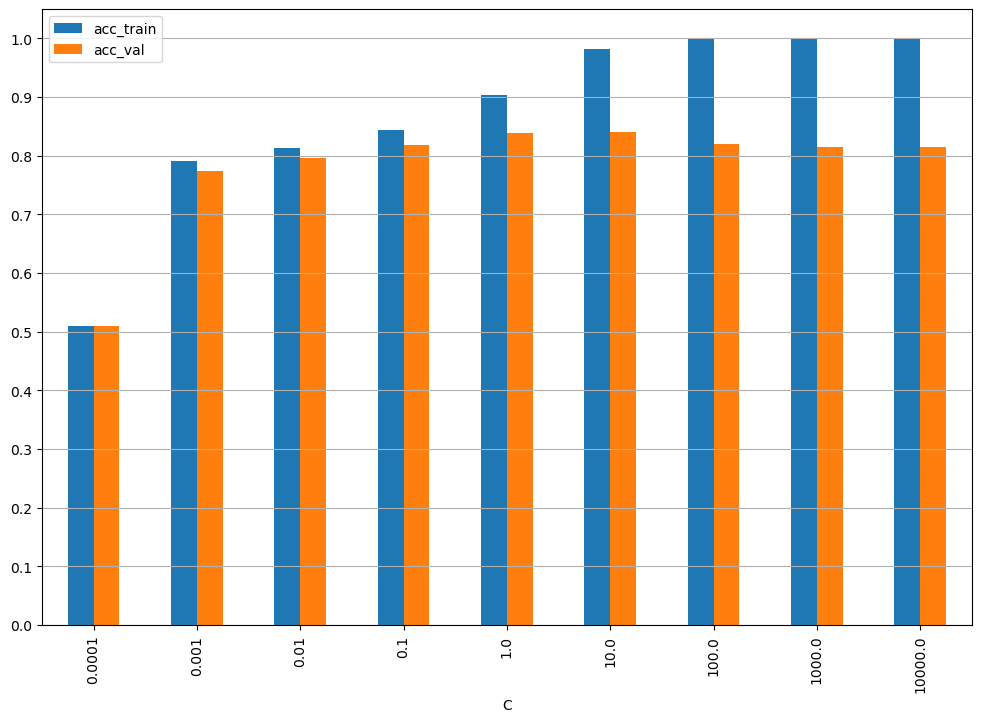

In [39]:
results.plot.bar(x='C', y=['acc_train', 'acc_val'], figsize=(12, 8))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.grid(axis='y')
plt.show()

# Logistic Regression Model

In [40]:
model = LogisticRegression(C=1.0, random_state=0)
acc_train1,acc_val1=evaluate_model(model, x_train, y_train, x_val, y_val)
print(acc_train1,acc_val1)

0.903046875 0.838125


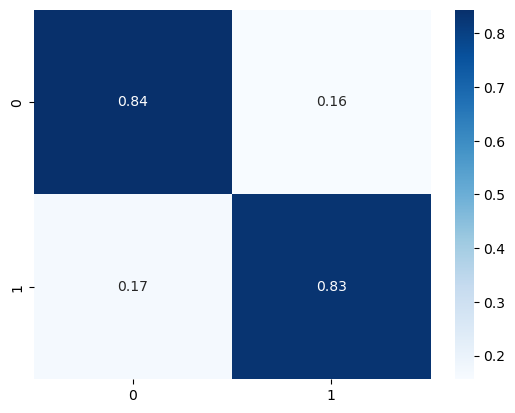

array([[1359,  251],
       [ 267, 1323]], dtype=int64)

In [41]:
plot_conf_matrix(model, x_val, y_val)

# Hyper-parameter tuning (n_neighbors)

In [42]:
n_neighbors_values = list(range(1, 30))
acc_train_values = []
acc_val_values = []

for n_neighbors in n_neighbors_values:
    model =KNeighborsClassifier(n_neighbors=n_neighbors)
    acc_train, acc_val = evaluate_model(model, x_train, y_train, x_val, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)
    
results_n_neighbors = pd.DataFrame({
    'n_neighbors': n_neighbors_values,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})

results_n_neighbors

,n_neighbors,acc_train,acc_val
0,1,1.000000,0.609375
1,2,0.813906,0.591562
2,3,0.825469,0.627188
3,4,0.780547,0.631250
4,5,0.789922,0.645938
5,6,0.773359,0.662188
6,7,0.778750,0.663750
7,8,0.769687,0.673125
8,9,0.767188,0.677188
9,10,0.767344,0.687187


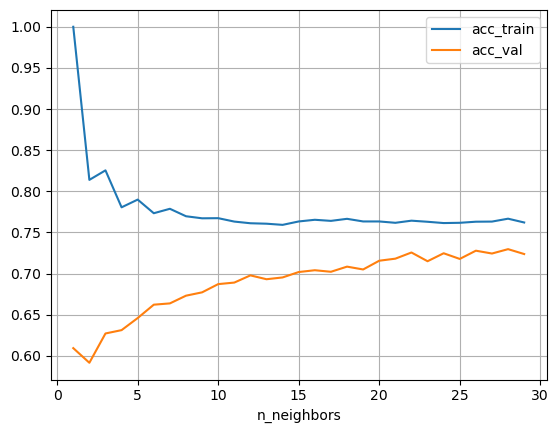

In [43]:
results_n_neighbors.plot(x='n_neighbors', y=['acc_train', 'acc_val'])
plt.grid()
plt.show()

# KNeighborsClassifier Model

In [44]:
model = KNeighborsClassifier(n_neighbors=29)

acc_train2,acc_val2=evaluate_model(model, x_train, y_train, x_val, y_val)
print(acc_train2,acc_val2)

0.762109375 0.72375


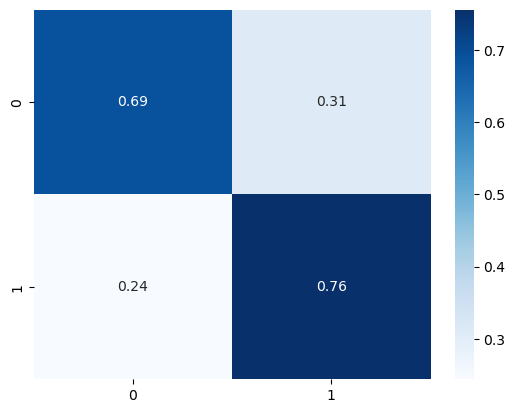

array([[1114,  496],
       [ 388, 1202]], dtype=int64)

In [45]:
plot_conf_matrix(model, x_val, y_val)

# Hyper-parameter tuning (max_depth)

In [46]:
max_depth_values = list(range(1, 10))
acc_train_values = []
acc_val_values = []

for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    acc_train, acc_val = evaluate_model(model, x_train, y_train, x_val, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)

results_max_depth = pd.DataFrame({
    'max_depth': max_depth_values,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})

results_max_depth

,max_depth,acc_train,acc_val
0,1,0.609766,0.605313
1,2,0.623203,0.616563
2,3,0.648125,0.643125
3,4,0.655469,0.645938
4,5,0.660156,0.645625
5,6,0.679766,0.663438
6,7,0.700547,0.671250
7,8,0.708125,0.676250
8,9,0.718203,0.683125


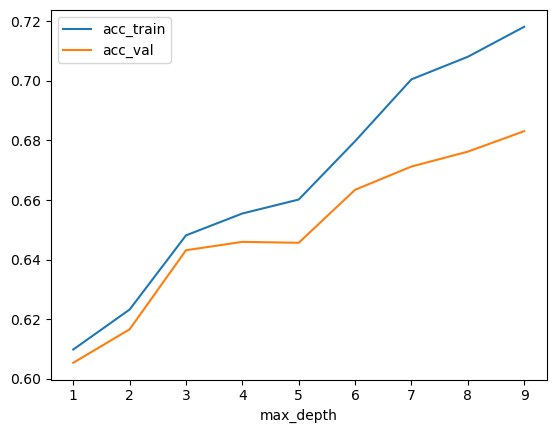

In [47]:
results_max_depth.plot(x='max_depth', y=['acc_train', 'acc_val'])
plt.show()

# DecisionTreeClassifier Model

In [48]:
model = DecisionTreeClassifier(max_depth=9, random_state=0)
acc_train3,acc_val3=evaluate_model(model, x_train, y_train, x_val, y_val)
print(acc_train3,acc_val3)

0.718203125 0.683125


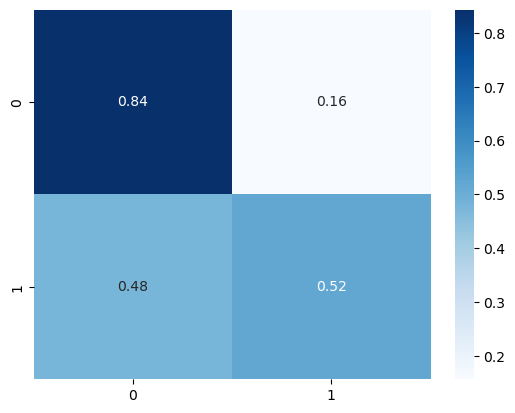

array([[1358,  252],
       [ 762,  828]], dtype=int64)

In [49]:
plot_conf_matrix(model, x_val, y_val)

# SVC Model

In [50]:
model = SVC()
acc_train4,acc_val4=evaluate_model(model, x_train, y_train, x_val, y_val)
print(acc_train4,acc_val4)

0.988828125 0.8425


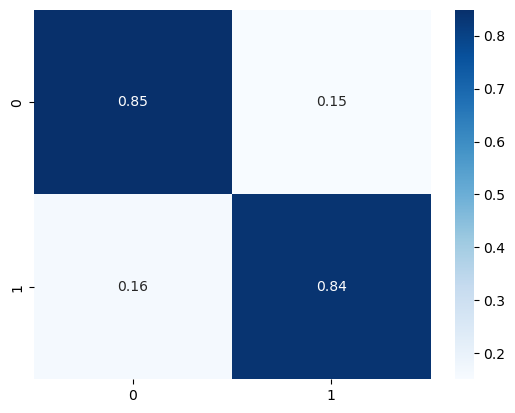

array([[1367,  243],
       [ 261, 1329]], dtype=int64)

In [51]:
plot_conf_matrix(model, x_val, y_val)

# Hyper-parameter tuning (n_estimators,max_depth)

In [52]:
rf=RandomForestClassifier()
param_grid = {
    'n_estimators' : [10, 50, 100, 200, 300, 400, 500],
    'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9],
}

grid_search = GridSearchCV(rf, param_grid, cv=5,return_train_score=True)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'max_depth': 7, 'n_estimators': 500}

# RandomForestClassifier Model

In [53]:
model = RandomForestClassifier(n_estimators=500, max_depth=7, random_state=0)
acc_train5,acc_val5=evaluate_model(model, x_train, y_train, x_val, y_val)
print(acc_train5,acc_val5)

0.846640625 0.801875


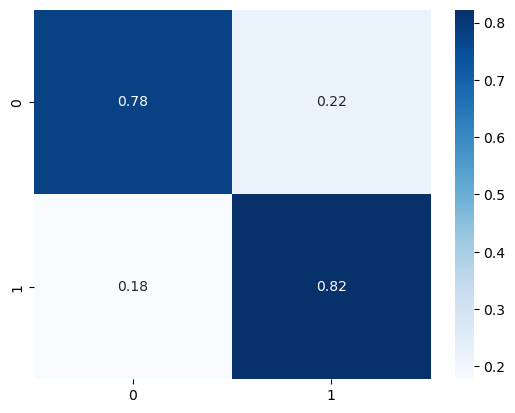

array([[1258,  352],
       [ 282, 1308]], dtype=int64)

In [54]:
plot_conf_matrix(model, x_val, y_val)

# XGBClassifier Model

In [55]:
model = XGBClassifier()
acc_train6,acc_val6=evaluate_model(model, x_train, y_train, x_val, y_val)
print(acc_train6,acc_val6)

0.933203125 0.8115625


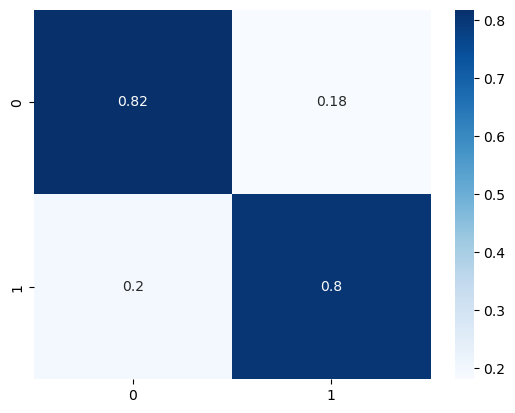

array([[1318,  292],
       [ 311, 1279]], dtype=int64)

In [56]:
plot_conf_matrix(model, x_val, y_val)

# Models

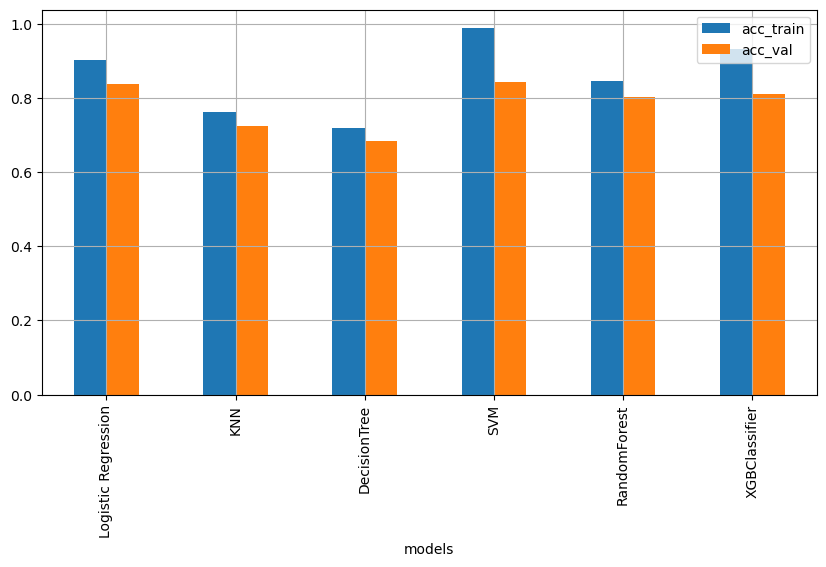

In [60]:
models = ['Logistic Regression','KNN','DecisionTree','SVM','RandomForest','XGBClassifier']
acc_train_values=[acc_train1,acc_train2,acc_train3,acc_train4,acc_train5,acc_train6]
acc_val_values=[acc_val1,acc_val2,acc_val3,acc_val4,acc_val5,acc_val6]

results = pd.DataFrame({
    'models': models,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})

results.plot(x='models', y=['acc_train', 'acc_val'],kind='bar',figsize=(10,5))
plt.grid(axis='both')
plt.show()